In [1]:
import pandas as pd
import numpy as np

In [6]:
num_days = 50
num_stocks = 100

In [9]:
true_realization = np.random.binomial(n=1, p=0.5, size=(num_stocks, num_days,))

In [10]:
true_realization.shape

(100, 50)

In [16]:
true_realization = np.sign(true_realization-0.5)

In [17]:
my_judgment = np.random.binomial(n=1, p=0.6, size=(num_stocks, num_days))
my_judgment = np.sign(my_judgment-0.5)

In [18]:
my_judgment_realization = my_judgment * true_realization

In [25]:
true_realization_evolution = true_realization.sum(axis=0)

In [29]:
my_decision = [determine_action(my_judgment_realization[:, j]) for j in range(my_judgment_realization.shape[1])]

In [26]:
true_realization_evolution

array([-12.,   0.,  -2.,   8.,  -6.,  -4., -14.,   0.,   2.,  -2.,   4.,
        14.,  -8.,   6.,  -4.,   0., -10., -12., -12., -14., -14.,  -8.,
        -2., -10.,  -8.,  -8.,   0.,  -4.,   0.,   0.,  18.,  -4.,  12.,
       -12.,  -6.,  -2., -18.,   2., -10.,  10.,   0.,  10., -12.,  -4.,
       -20.,  -4.,   4., -24.,  18.,   4.])

In [31]:
my_evoluation = my_decision * true_realization_evolution

In [33]:
my_evoluation

array([-0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [109]:
def determine_action(arr):
    if sum(arr) >= 10:
        return 1
    elif sum(arr) <= -10:
        return -1
    return 0

@collect_statistics
def do_experiment(num_days, num_stocks):
    true_realization = np.random.binomial(n=1, p=0.5, size=(num_stocks, num_days,))
    true_realization = np.sign(true_realization-0.5)
    my_judgment = np.random.binomial(n=1, p=0.6, size=(num_stocks, num_days))
    my_judgment = np.sign(my_judgment-0.5)
    
    true_result = true_realization.sum(axis=0)
    
    my_judgment_realization = my_judgment * true_realization
    stock_bets_result = my_judgment_realization.sum(axis=0)
    
    my_decision = [determine_action(my_judgment_realization[:, j]) for j in range(my_judgment_realization.shape[1])]
    my_evoluation = my_decision * true_result
    
    df = pd.DataFrame({
        'real':true_result,
        'stock bets':stock_bets_result,
        'etf bets':my_evoluation
    })
    return df

In [110]:
def collect_statistics(func):
    def wrapper(*args, **kwargs):
        result_list1 = []
        result_list2 = []
        for i in range(500):
            res = func(*args, **kwargs).cumsum().iloc[-1,:]
            value1 = res['etf bets'] - res['stock bets']
            value2 = res['etf bets'] - res['real']
            result_list1.append(value1)
            result_list2.append(value2)
        return result_list1, result_list2
    return wrapper

In [111]:
res1, res2 = do_experiment(250,100)

<AxesSubplot:ylabel='Frequency'>

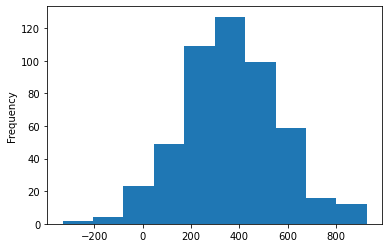

In [112]:
pd.Series(res).plot.hist()

In [113]:
pd.Series(res).mean()

364.432

In [114]:
pd.Series(res).std()

198.26151576457428

<AxesSubplot:ylabel='Frequency'>

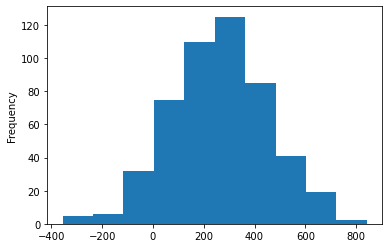

In [115]:
pd.Series(res2).plot.hist()

In [116]:
pd.Series(res2).mean()

259.692

In [117]:
pd.Series(res2).std()

191.95501188866717

In [118]:
def do_experiment(num_days, num_stocks):
    true_realization = np.random.binomial(n=1, p=0.5, size=(num_stocks, num_days,))
    true_realization = np.sign(true_realization-0.5)
    my_judgment = np.random.binomial(n=1, p=0.6, size=(num_stocks, num_days))
    my_judgment = np.sign(my_judgment-0.5)
    
    true_result = true_realization.sum(axis=0)
    
    my_judgment_realization = my_judgment * true_realization
    stock_bets_result = my_judgment_realization.sum(axis=0)
    
    my_decision = [determine_action(my_judgment_realization[:, j]) for j in range(my_judgment_realization.shape[1])]
    my_evoluation = my_decision * true_result
    
    df = pd.DataFrame({
        'real':true_result,
        'stock bets':stock_bets_result,
        'etf bets':my_evoluation
    })
    return df

<AxesSubplot:>

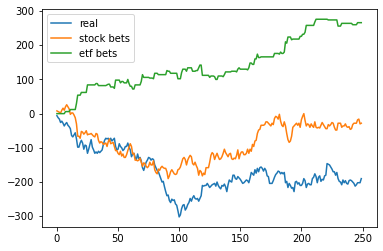

In [142]:
do_experiment(num_days=250, num_stocks=100).cumsum().plot()